### Perform Principal component analysis and perform clustering using first 
### 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
### optimum number of clusters and check whether we have obtained same number of clusters with the original data 
### (class column we have ignored at the begining who shows it has 3 clusters)df
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv(r"wine.csv")

In [4]:
df.head(5)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [7]:
# Checking datatypes
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [8]:
# Checking dupliacte values
df[df.duplicated()]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

In [9]:
# Finding Missing Values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[159, 121, 69, 166, 158, 137, 59, 73, 173, 78, 110, 115, 151, 25, 123, 95, 127]
17


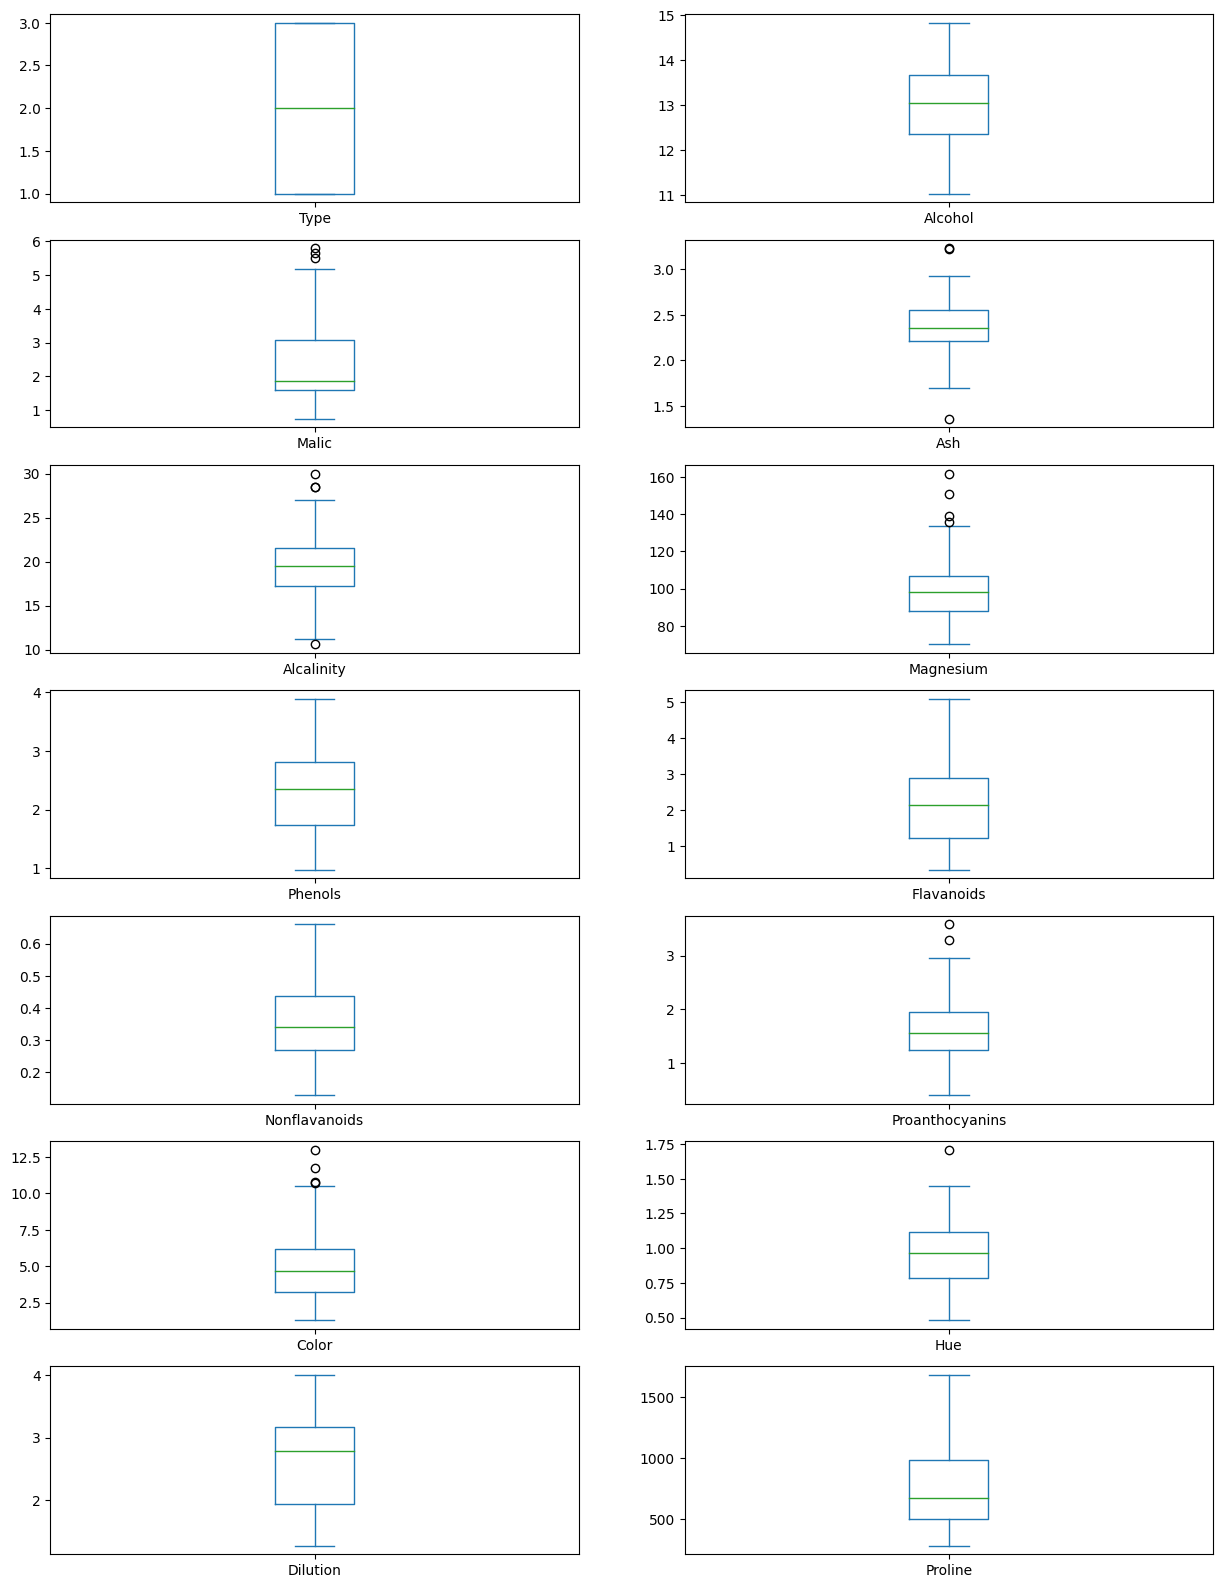

In [10]:
# Box plot find the outliers 

box_plot = df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(df.columns, box_plot):
    outliers = ((df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Using IQR to detect the outliers

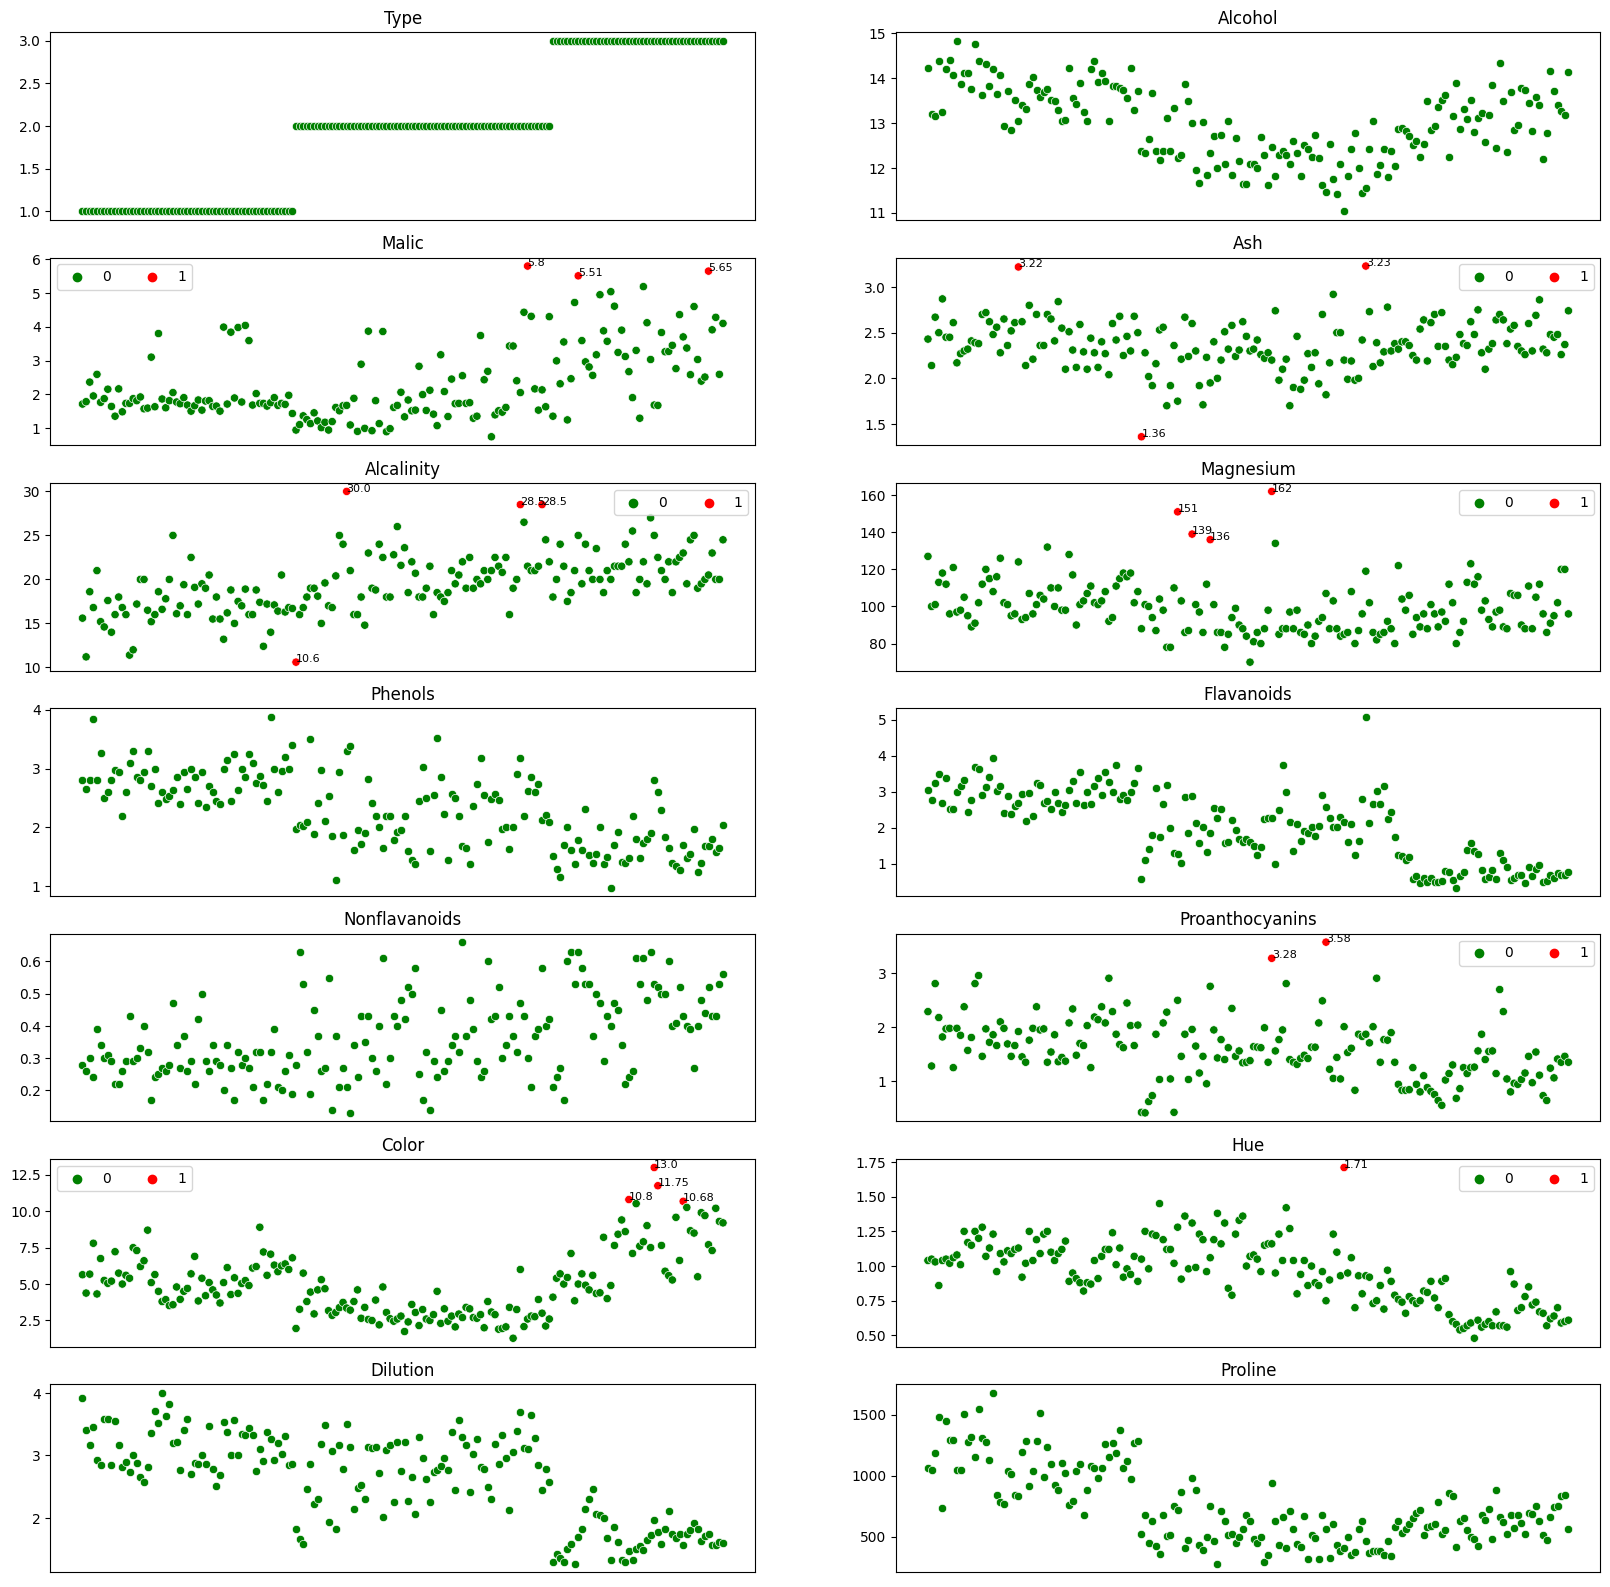

Row indices of potential outliers:
Int64Index([25, 59, 69, 73, 78, 95, 110, 115, 121, 123, 127, 137, 151, 158,
            159, 166, 173],
           dtype='int64')


In [16]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 20))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(df[i], 1.5)
   
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
plt.show()

# Calculate the IQR for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Identify potential outliers based on the IQR method
outliers = ((df < (Q1 - IQR_multiplier * IQR)) | (df > (Q3 + IQR_multiplier * IQR)))

# Get the row indices of potential outliers
row_indices = df.index[outliers.any(axis=1)]

# Print the row indices of potential outliers
print("Row indices of potential outliers:")
print(row_indices)

### Using Z-Scores to detect the outliers

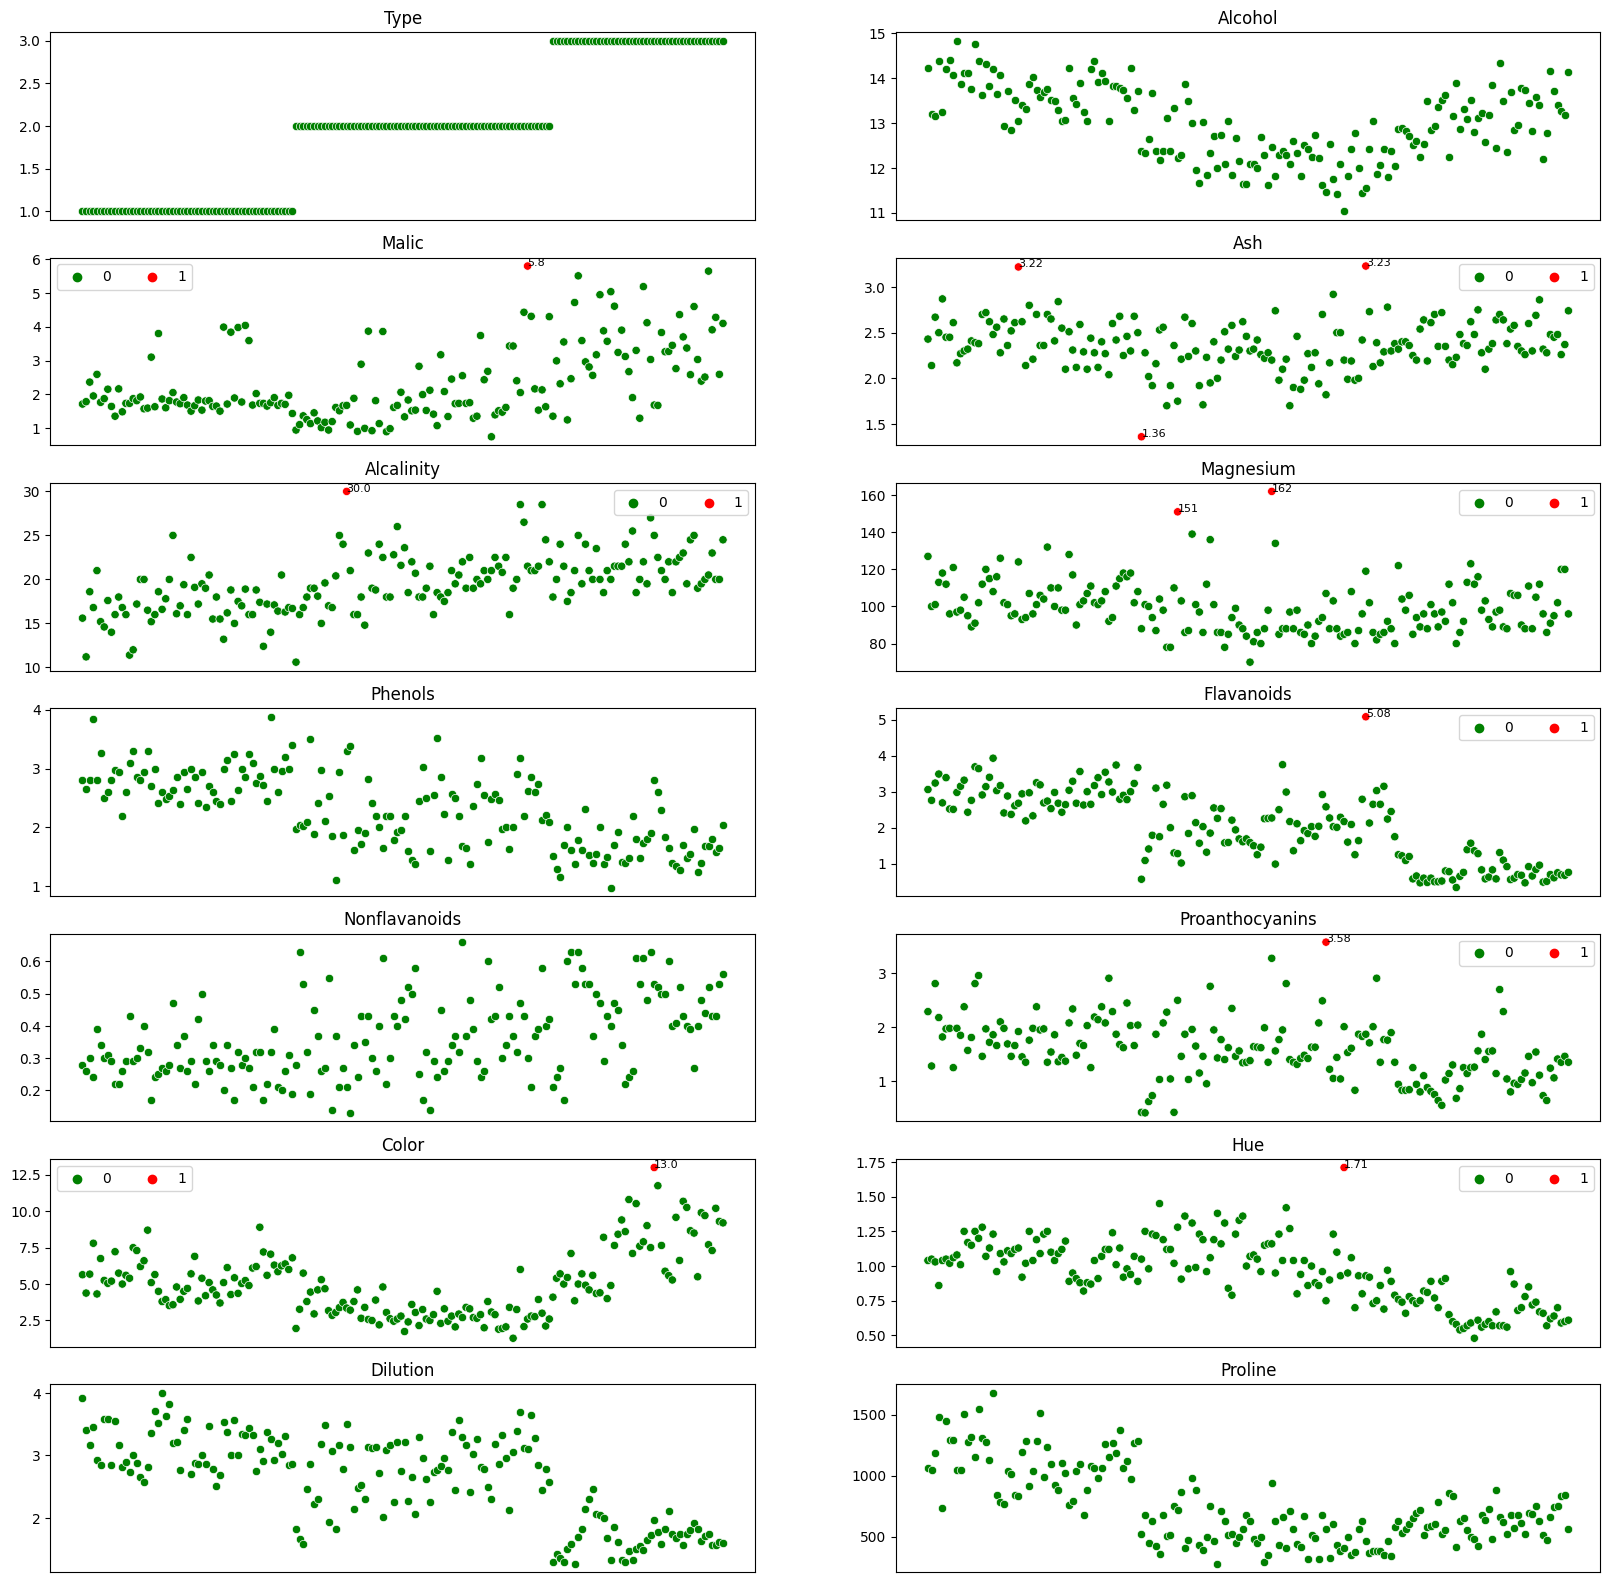

In [19]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 20))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(df[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1

plt.show()

### From the above methods, around 17 records are outlier and we need to treat this outlier. We are replacing the outlier with the median value.

In [21]:
# Calculate the IQR for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Iterate through columns and replace outliers with median
for col in df.columns:
    outliers = ((df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    median = df[col].median()
    df.loc[outliers, col] = median

### Boxplot after treating outliers

Indices of outliers from the box plots:
[96, 66, 100, 167, 76, 175, 153, 155]
8


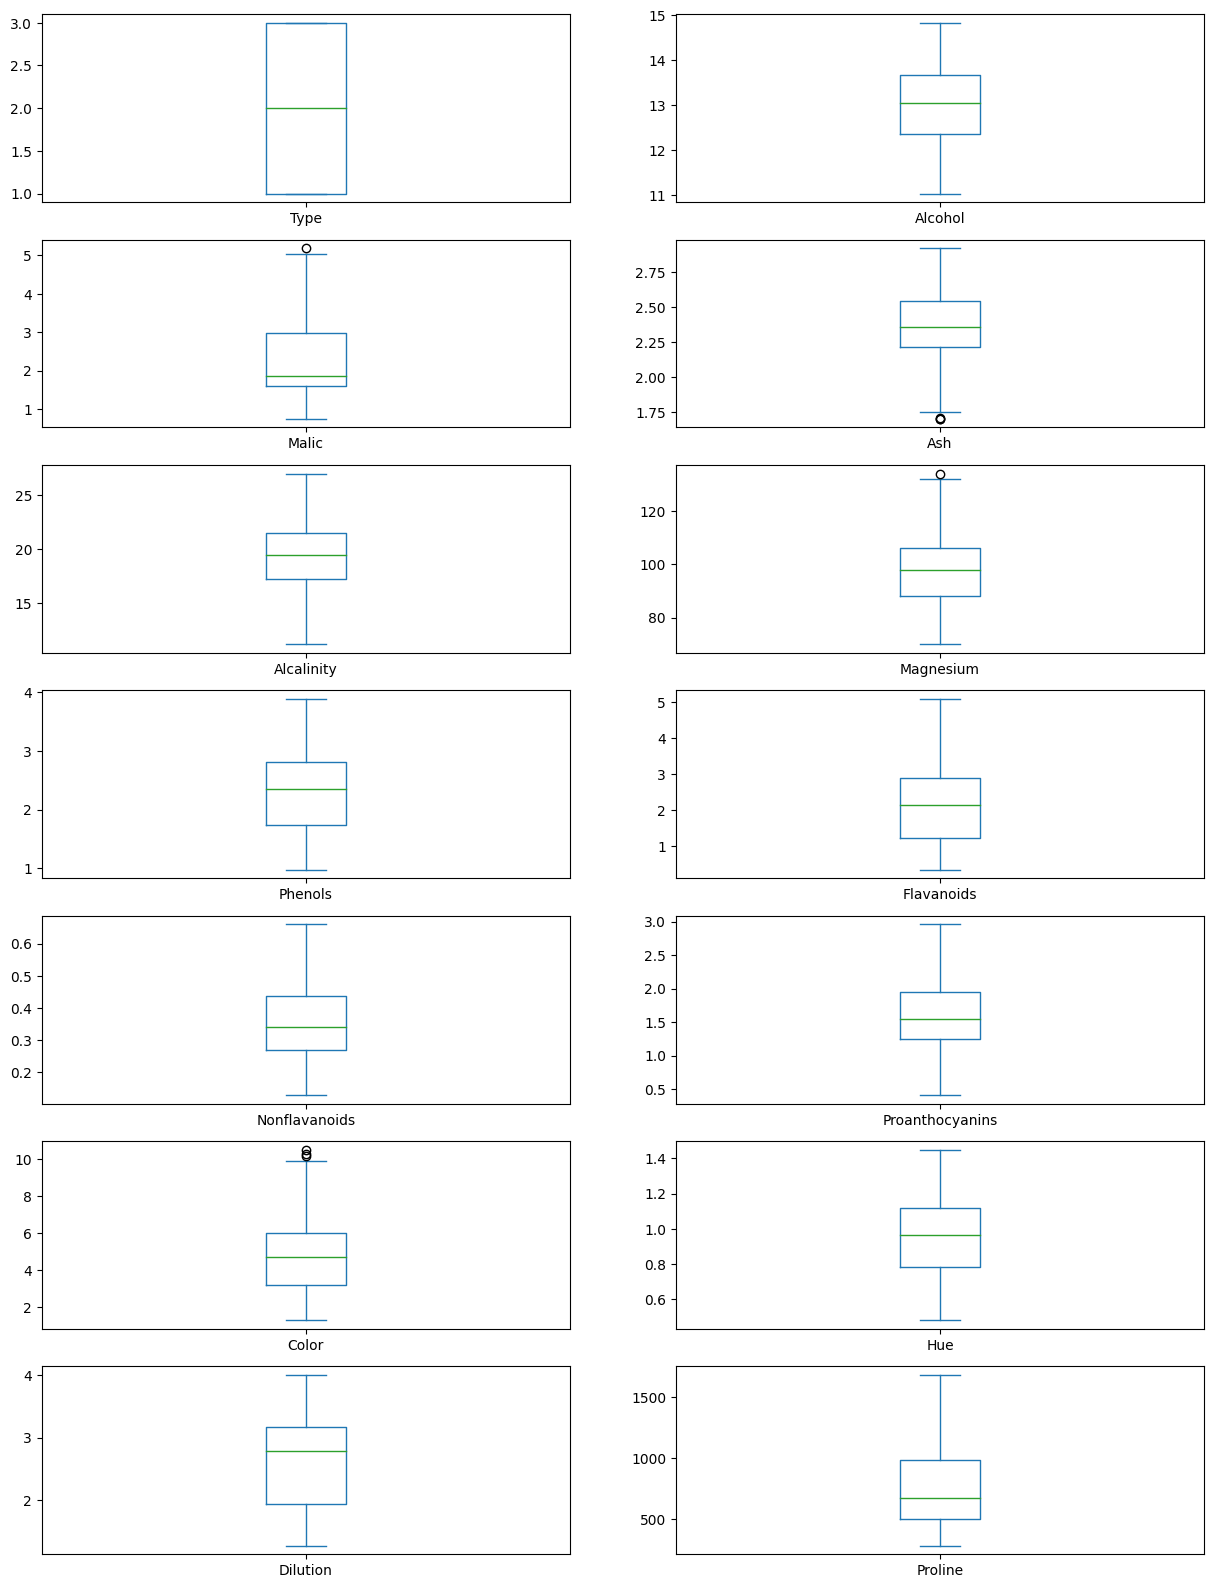

In [22]:
# Box plot find the outliers 

box_plot = df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(df.columns, box_plot):
    outliers = ((df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [23]:
# Correlation matrix to check the multi collinearity of the features
df.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.417248 -0.031042    0.568695   
Alcohol         -0.328222  1.000000  0.094517  0.250926   -0.300206   
Malic            0.417248  0.094517  1.000000  0.167830    0.283726   
Ash             -0.031042  0.250926  0.167830  1.000000    0.333514   
Alcalinity       0.568695 -0.300206  0.283726  0.333514    1.000000   
Magnesium       -0.251179  0.373678  0.049494  0.369610   -0.151387   
Phenols         -0.719163  0.289101 -0.338178  0.092936   -0.413624   
Flavanoids      -0.847498  0.236815 -0.401074  0.020775   -0.483894   
Nonflavanoids    0.489109 -0.155929  0.259025  0.157175    0.368420   
Proanthocyanins -0.534843  0.197881 -0.250179 -0.002122   -0.294232   
Color            0.192705  0.552321  0.294128  0.213691   -0.071654   
Hue             -0.638817 -0.027921 -0.550005 -0.076295   -0.348586   
Dilution        -0.788230  0.072343 -0.363296 -0.067580   -0.370022   
Proline         -0.633717  0.643720 -0.167927  0.244149   -0.483096   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.251179 -0.719163   -0.847498       0.489109   
Alcohol           0.373678  0.289101    0.236815      -0.155929   
Malic             0.049494 -0.338178   -0.401074       0.259025   
Ash               0.369610  0.092936    0.020775       0.157175   
Alcalinity       -0.151387 -0.413624   -0.483894       0.368420   
Magnesium         1.000000  0.238480    0.226418      -0.220650   
Phenols           0.238480  1.000000    0.864564      -0.449935   
Flavanoids        0.226418  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.220650 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.094834  0.616330    0.679169      -0.362769   
Color             0.330018 -0.051603   -0.128063       0.106812   
Hue              -0.012996  0.442675    0.558347      -0.295274   
Dilution          0.044218  0.699949    0.787194      -0.503270   
Proline           0.428714  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.534843  0.192705 -0.638817 -0.788230 -0.633717  
Alcohol                 0.197881  0.552321 -0.027921  0.072343  0.643720  
Malic                  -0.250179  0.294128 -0.550005 -0.363296 -0.167927  
Ash                    -0.002122  0.213691 -0.076295 -0.067580  0.244149  
Alcalinity             -0.294232 -0.071654 -0.348586 -0.370022 -0.483096  
Magnesium               0.094834  0.330018 -0.012996  0.044218  0.428714  
Phenols                 0.616330 -0.051603  0.442675  0.699949  0.498115  
Flavanoids              0.679169 -0.128063  0.558347  0.787194  0.494193  
Nonflavanoids          -0.362769  0.106812 -0.295274 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.046453  0.312777  0.546521  0.353529  
Color                  -0.046453  1.000000 -0.453418 -0.381642  0.380691  
Hue                     0.312777 -0.453418  1.000000  0.576809  0.264326  
Dilution                0.546521 -0.381642  0.576809  1.000000  0.312761  
Proline                 0.353529  0.380691  0.264326  0.312761  1.000000

<AxesSubplot: >

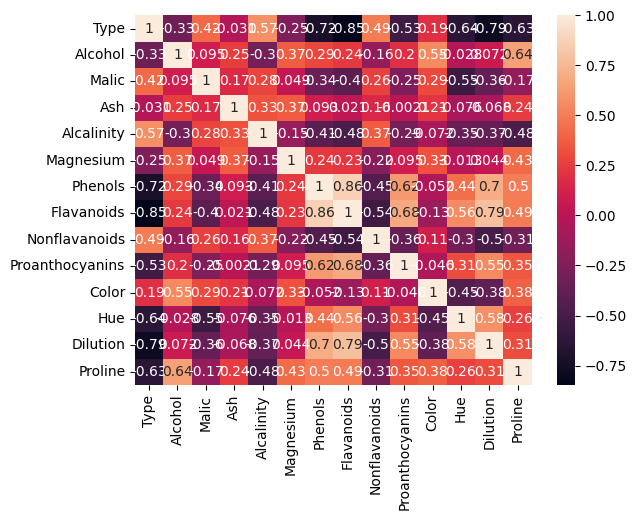

In [24]:
# Heatmaps for the given dataset.
sns.heatmap(df.corr(), annot=True)

### None of the values is near or equal to 1 or -1. Hence no multicolinearity present.

In [25]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(df)  
print("VIF Results:")
print(vif_results)

VIF Results:
            feature         VIF
0              Type   43.852046
1           Alcohol  282.043457
2             Malic    9.211412
3               Ash  166.744890
4        Alcalinity   92.671586
5         Magnesium   94.412929
6           Phenols   64.406536
7        Flavanoids   46.109806
8     Nonflavanoids   14.828939
9   Proanthocyanins   18.789004
10            Color   18.487601
11              Hue   43.336650
12         Dilution   54.503803
13          Proline   25.143662


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.
### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

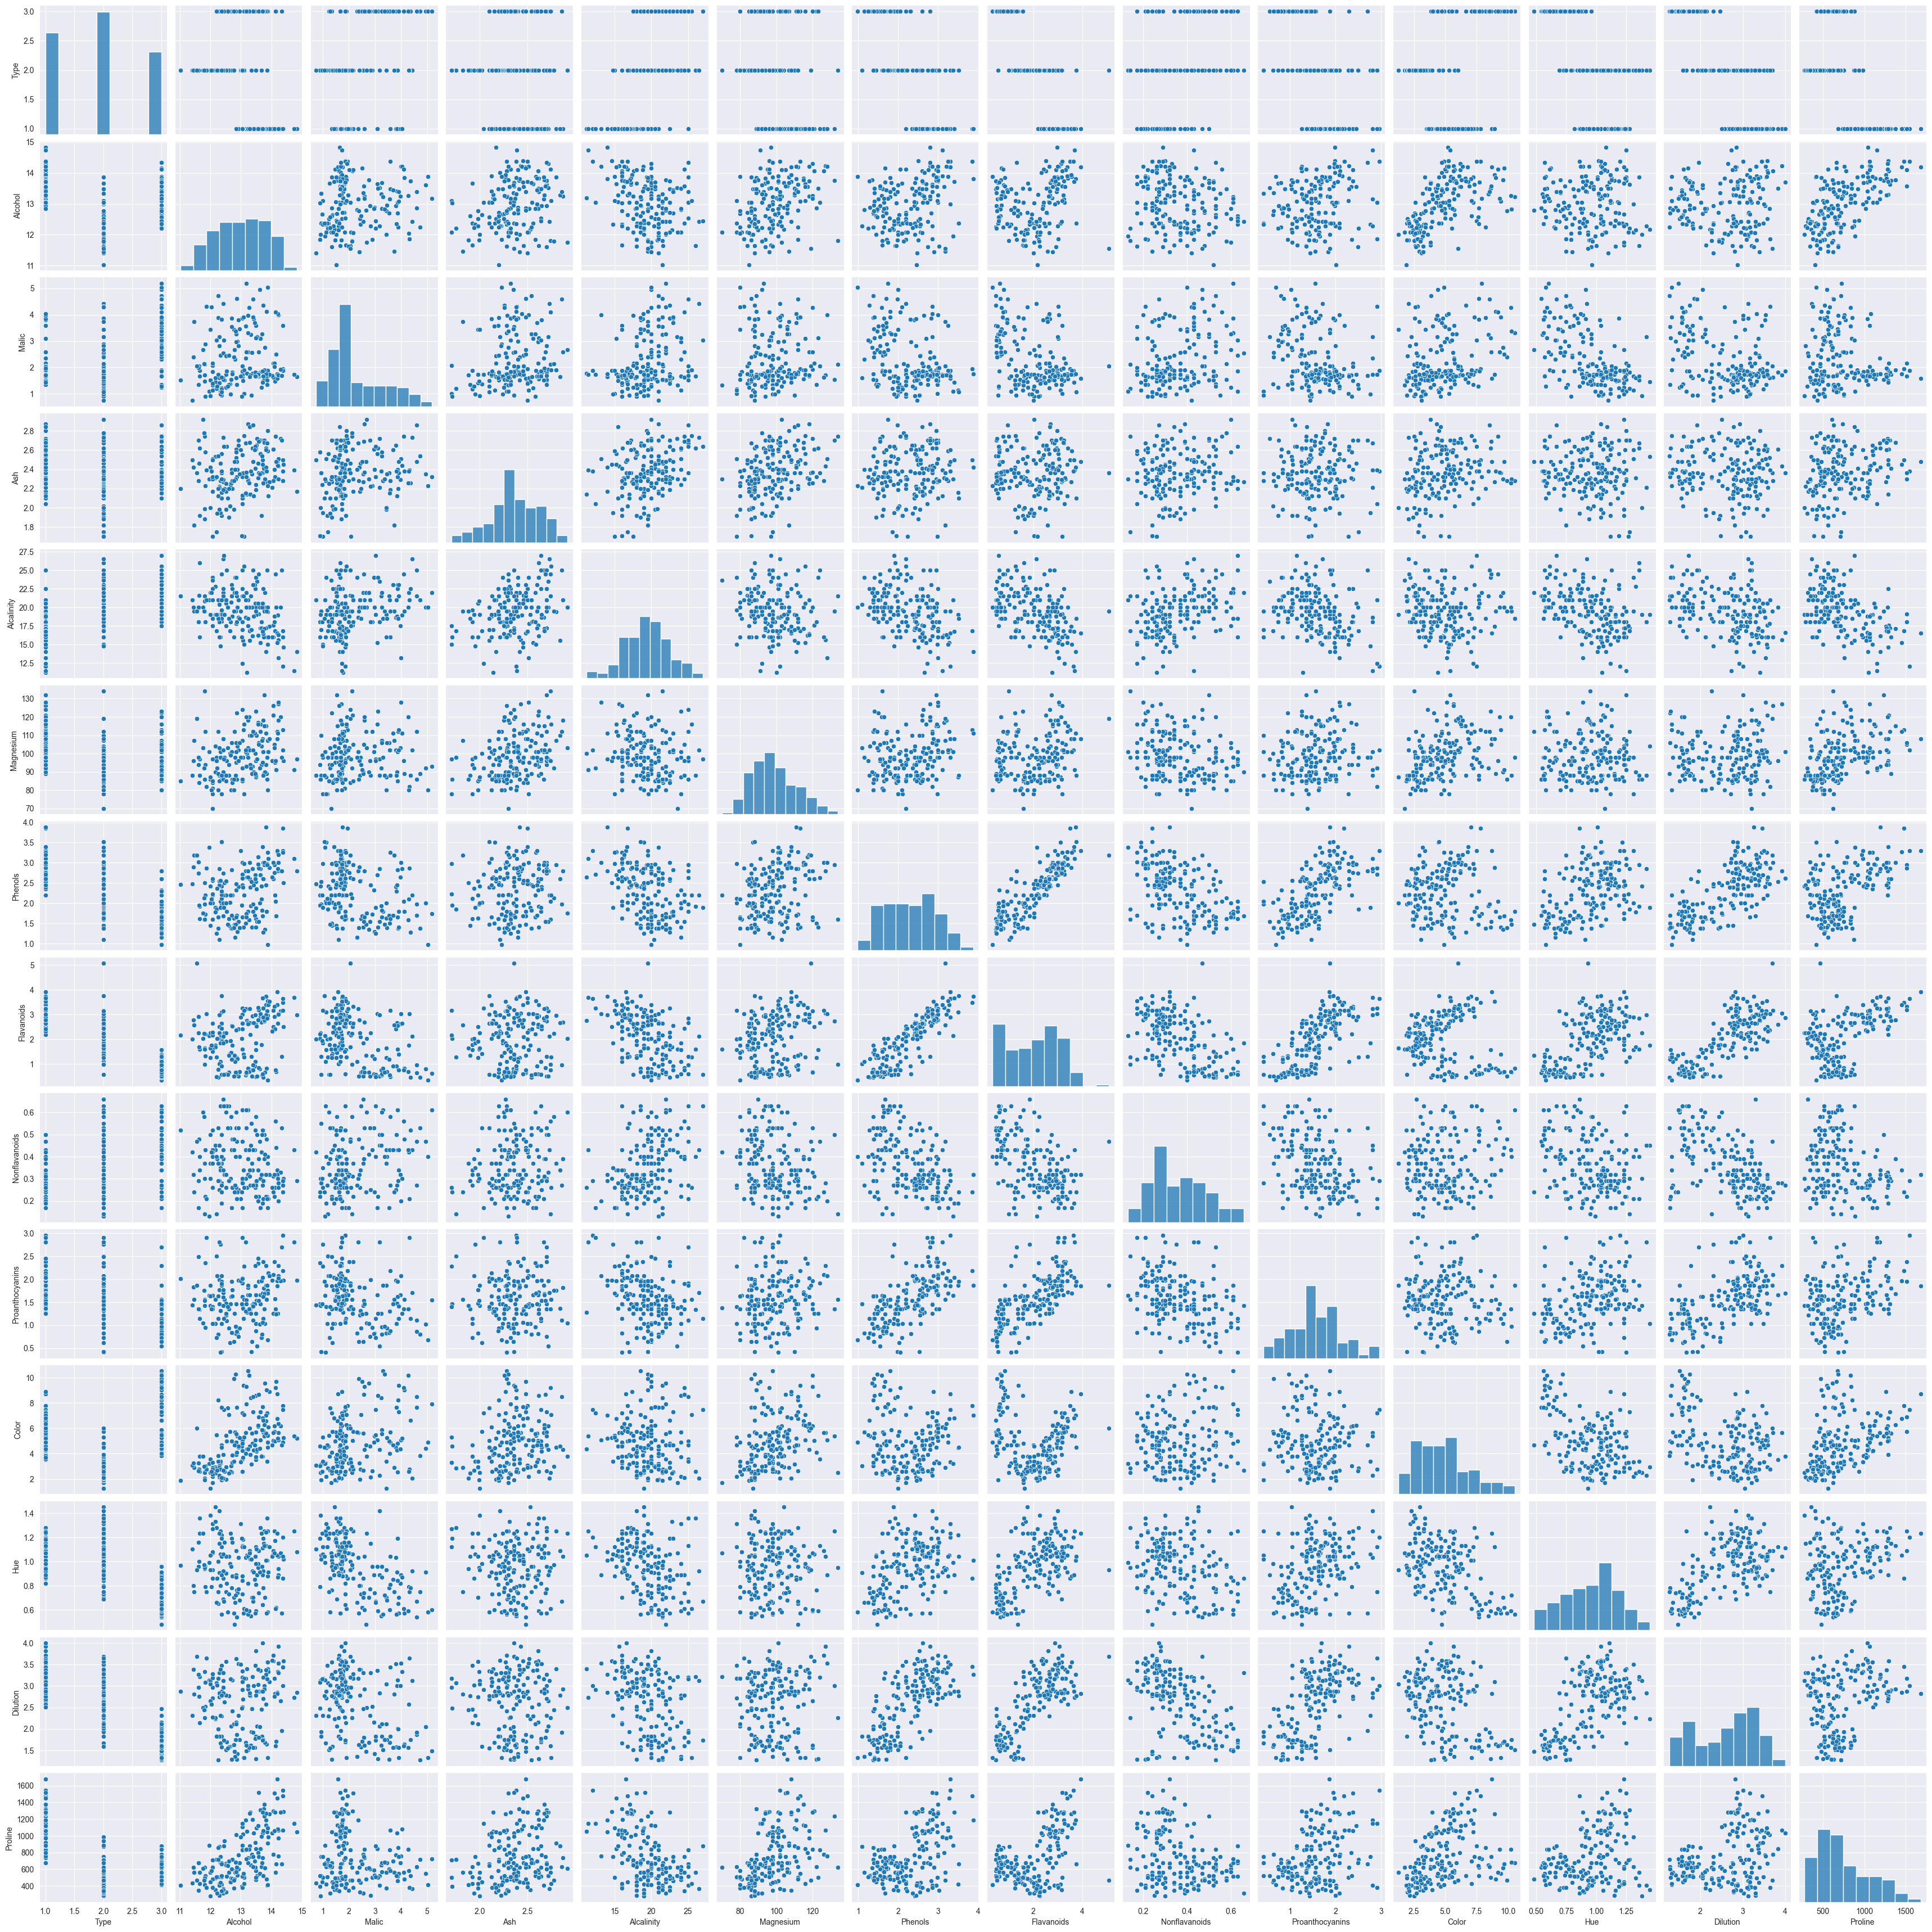

In [26]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

### Each of the histogram shows that most the features are normally distributed.

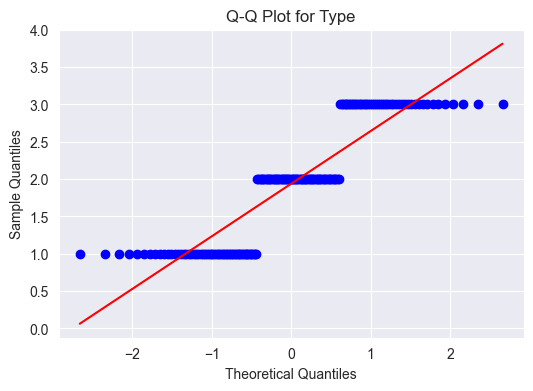

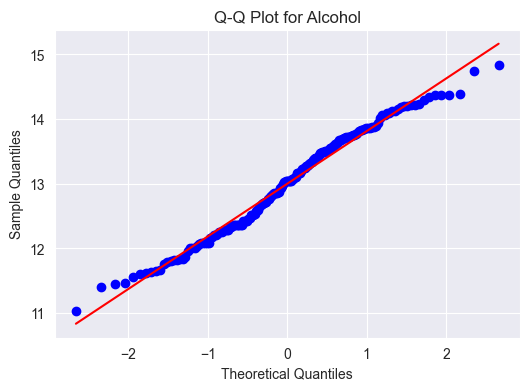

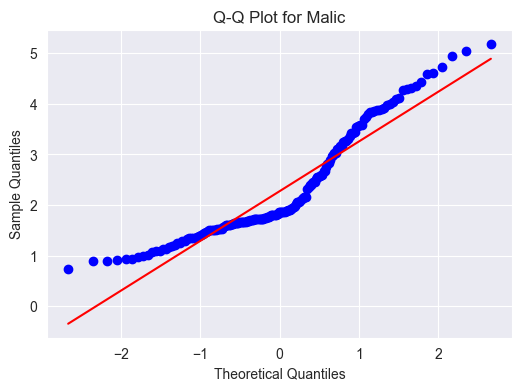

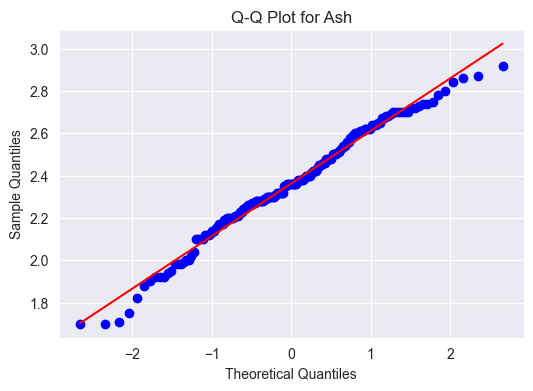

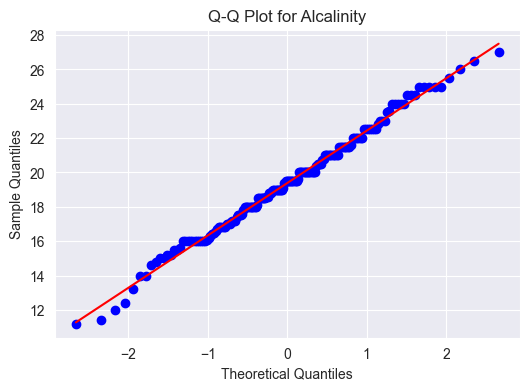

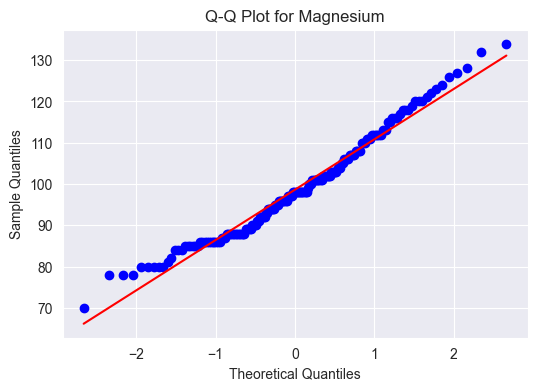

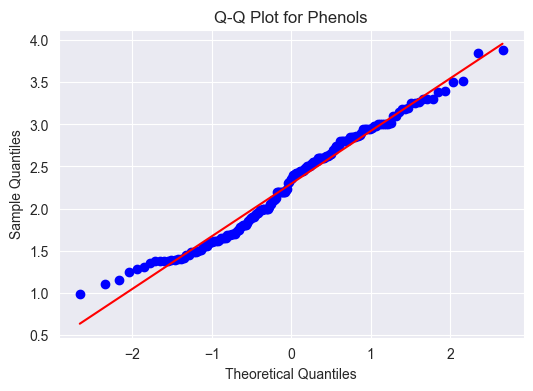

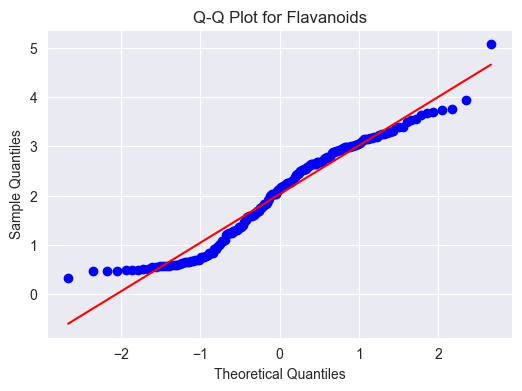

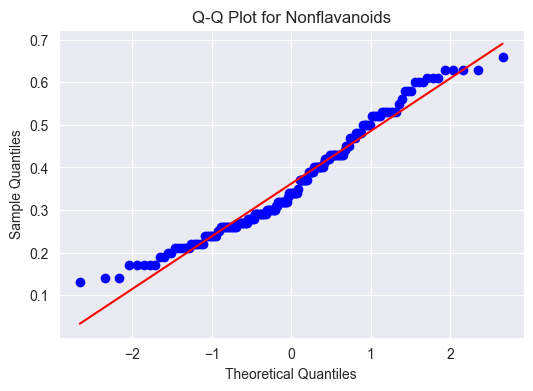

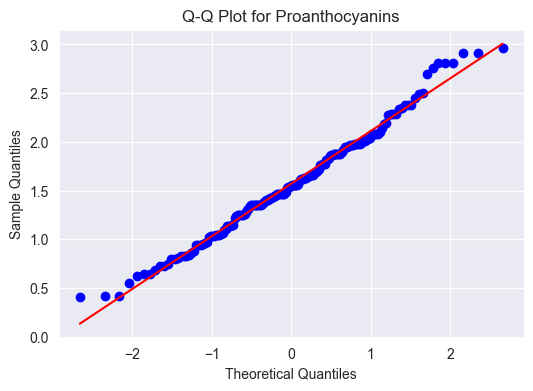

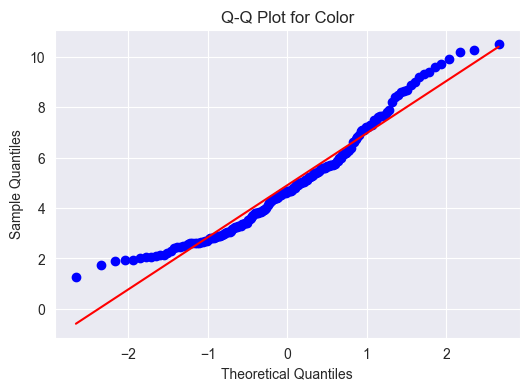

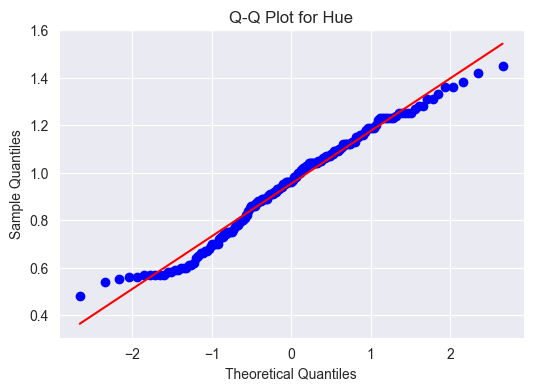

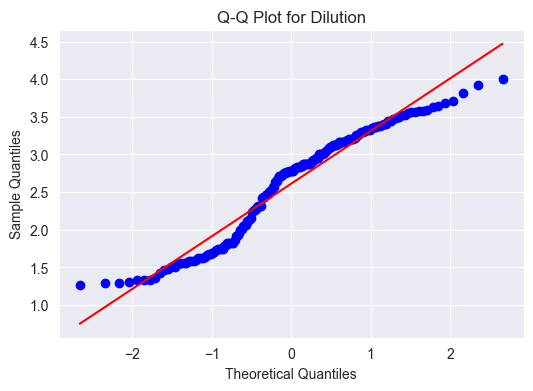

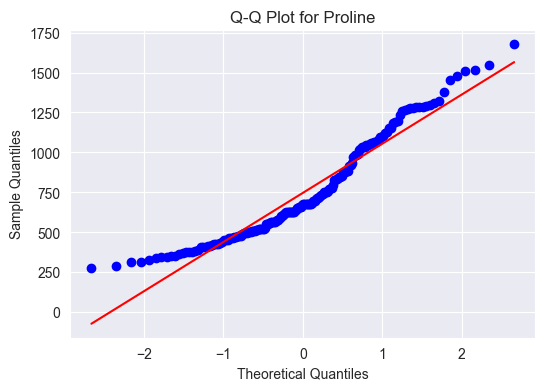

In [27]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Each of the Q-Q plot shows that each of the feature is normally distributed.
### Hence we can use Standardization for transformation.

In [82]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df.iloc[:,0:])

# Create a new DataFrame with the standardized data
stnd_df = pd.DataFrame(standardized_data, columns=df.columns)

### Applying PCA on the standardized dataset 

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(stnd_df)

In [84]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.40370885, 0.18881135, 0.0887669 ])

In [85]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([40.37, 59.25, 68.13])

In [86]:
pca.components_

array([[-0.38948994,  0.14677215, -0.20918198, -0.00428164, -0.26046403,
         0.11770583,  0.35705489,  0.38948037, -0.26012321,  0.28596228,
        -0.05633584,  0.27677396,  0.34508657,  0.27166147],
       [-0.00478948, -0.46119132, -0.24624177, -0.3148705 ,  0.03937352,
        -0.37628466, -0.03750497,  0.02331684, -0.03054543,  0.00232034,
        -0.51253905,  0.25143051,  0.17579492, -0.35306463],
       [-0.04128039, -0.15352018,  0.04781979,  0.68879615,  0.55291279,
         0.17460685,  0.13995542,  0.09986635,  0.1560886 ,  0.08957664,
        -0.24365555,  0.10818365,  0.14398848, -0.08970876]])

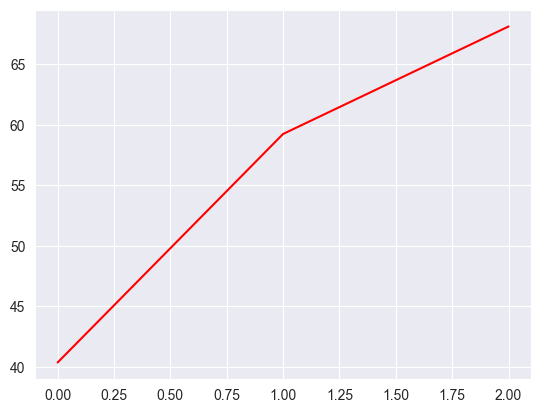

In [87]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [88]:
pc_column_names = [f"PC{i+1}" for i in range(0,3)]
pc_df = pd.DataFrame(principal_components, columns=pc_column_names)

In [89]:
pc_df

PC1       PC2       PC3
0    3.658776 -1.667050  0.057129
1    2.662272  0.258818 -1.953645
2    2.849265 -1.020137  1.072222
3    4.035510 -2.809083 -0.087711
4    1.381005 -1.116196  2.445092
..        ...       ...       ...
173 -2.865866 -1.587663 -0.635198
174 -2.981656 -1.992323  0.183724
175 -2.962532 -3.242102 -1.161028
176 -2.688466 -2.706646 -0.636227
177 -3.546393 -2.973788  0.976230

[178 rows x 3 columns]

## Applying clustering on PCA dataframe. 

### K-means clustering

### To choose the optimum cluster we use elbow method.

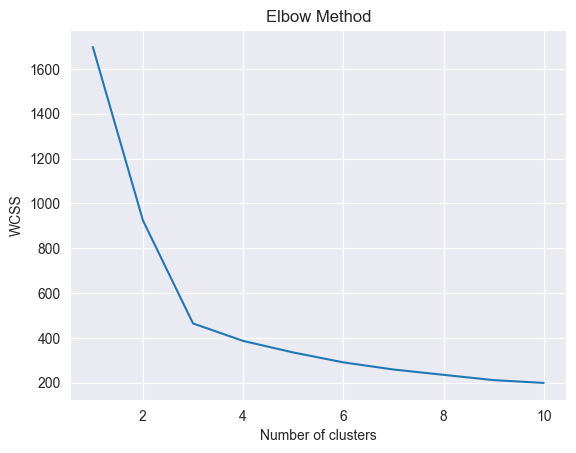

In [90]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pc_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### After the 5 clusters the slope is almost constant. Hence 5 is optimum cluster value. 

### Building cluster model

In [91]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(pc_df)

KMeans(n_clusters=5, random_state=42)

In [92]:
clusters_new.labels_

array([1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 4, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 0, 3,
       4, 4, 0, 4, 0, 3, 0, 3, 3, 4, 4, 0, 4, 0, 4, 4, 0, 2, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 3,
       4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [93]:
#Assign clusters to the data set
pc_df['clusterid_new'] = clusters_new.labels_

In [94]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.7717799 ,  1.58674083,  0.8678447 ],
       [ 3.00055659, -1.25395454, -0.42523348],
       [-3.03603373, -1.26622438, -0.17935195],
       [ 1.83772186, -0.21291799,  1.0097791 ],
       [ 0.38834537,  2.05924263, -0.96038928]])

In [95]:
pc_df.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new       PC1       PC2       PC3
                     mean      mean      mean
0             0 -0.771780  1.586741  0.867845
1             1  3.000557 -1.253955 -0.425233
2             2 -3.036034 -1.266224 -0.179352
3             3  1.837722 -0.212918  1.009779
4             4  0.388345  2.059243 -0.960389

In [96]:
pc_df.head(5)

PC1       PC2       PC3  clusterid_new
0  3.658776 -1.667050  0.057129              1
1  2.662272  0.258818 -1.953645              1
2  2.849265 -1.020137  1.072222              3
3  4.035510 -2.809083 -0.087711              1
4  1.381005 -1.116196  2.445092              3

# Hierarchical clustering

In [97]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

### Drawing dendrogram for each linkage to find the optimum number of clusters
### Dendrogram of single linkage

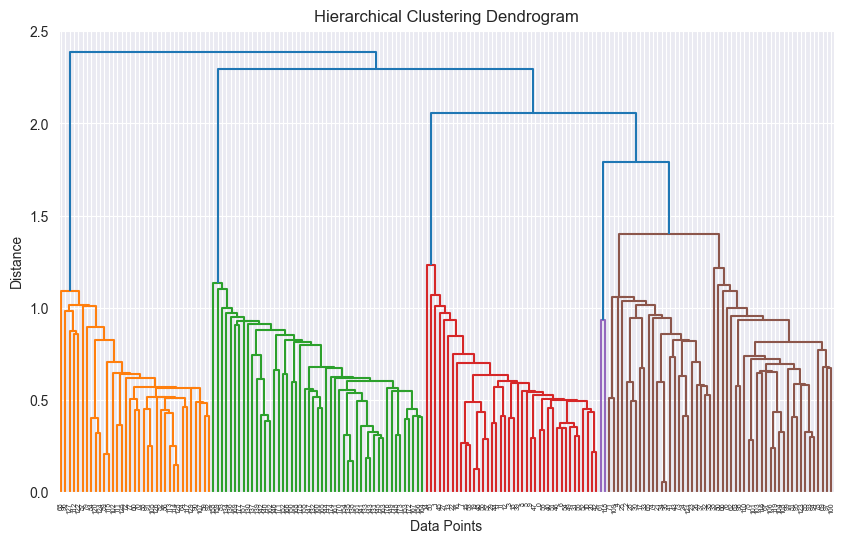

In [98]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pc_df, method='single'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of complete linkage

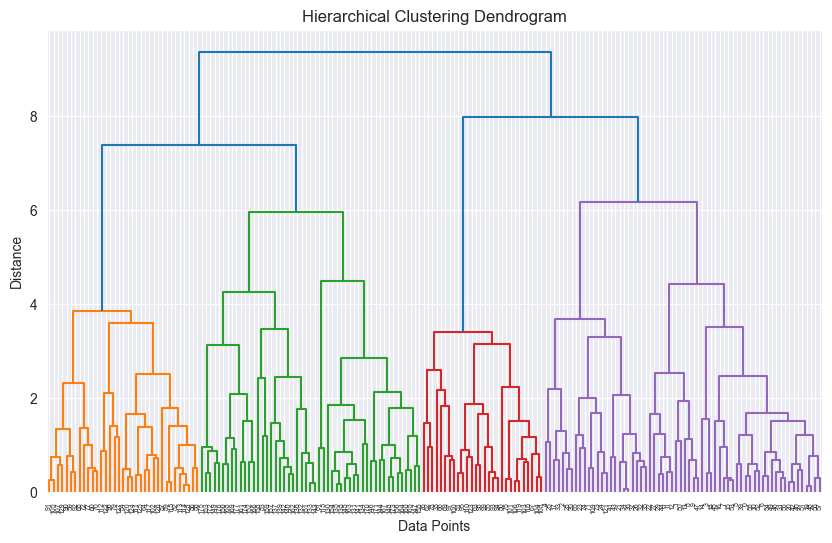

In [99]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pc_df, method='complete'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of average linkage

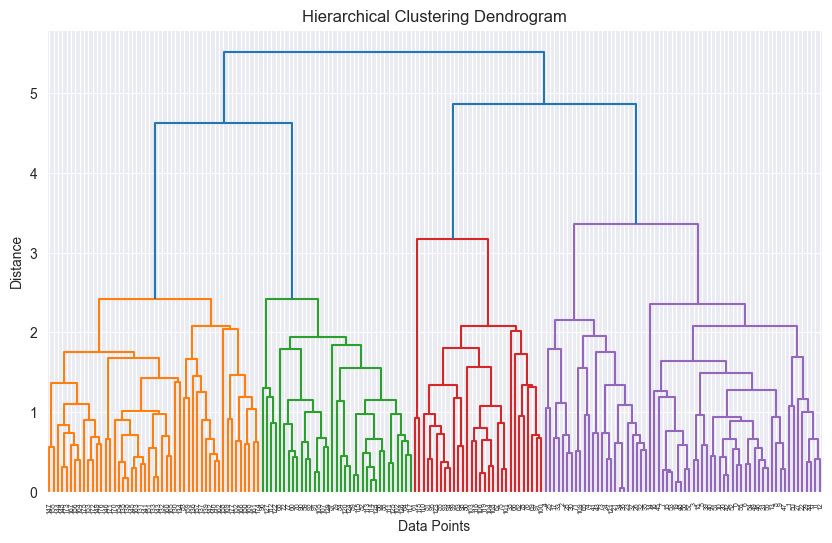

In [100]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pc_df, method='average'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of centroid linkage

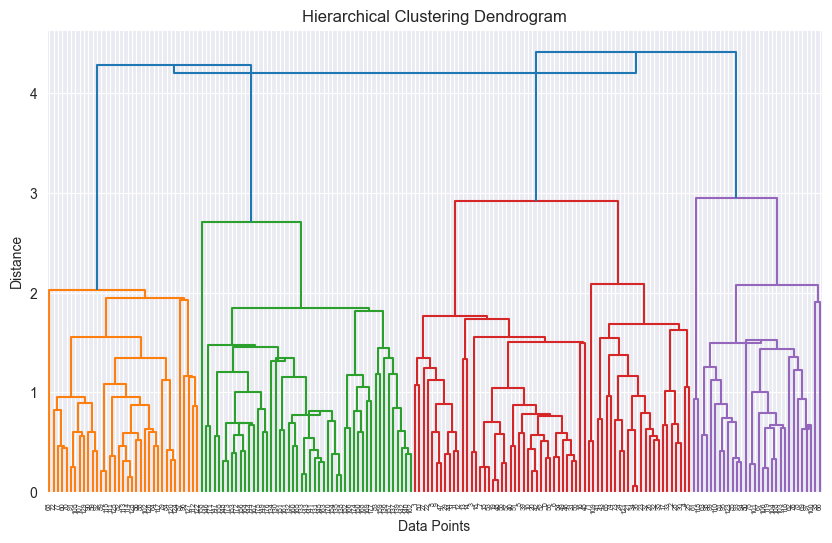

In [101]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pc_df, method='centroid'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of ward linkage

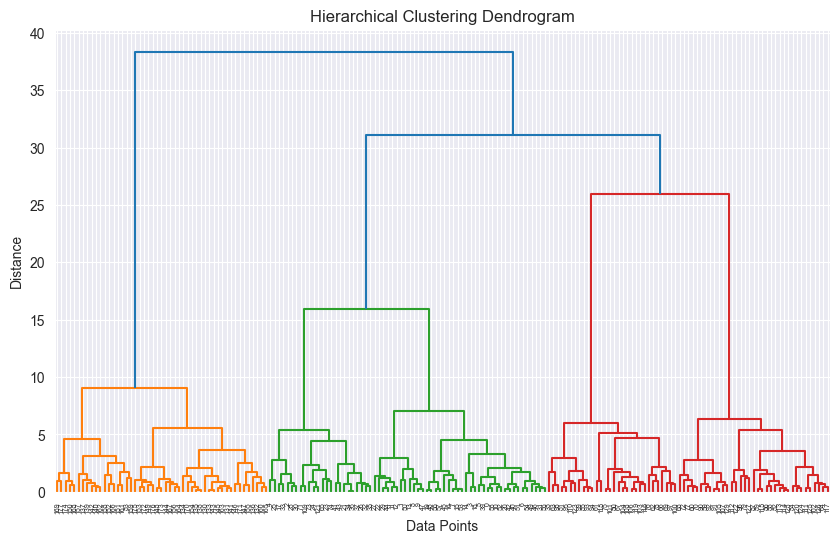

In [102]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pc_df, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### From the dendrogram we can see different clustering.
### Single linkage - 6 clusters
### Complete linkage - 5 clusters
### Average linkage - 5 clusters
### Centroid linkage - 5 clusters
### Ward linkage - 4 clusters
### From the above clustering we can conclude that 5 is the optimum number of clustering as ward linkage and complete suggest the same.

In [103]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [104]:
# save clusters for chart
y_hc = hc.fit_predict(pc_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [105]:
Clusters.head(5)

Clusters
0         2
1         2
2         4
3         2
4         4

In [106]:
h_df = pc_df.drop(['clusterid_new'], axis=1)

In [107]:
# Concatenate the original dataframe qaqnd cluster dataframe
heir_df = pd.concat([h_df, Clusters], axis=1)

In [108]:
heir_df.head(5)

PC1       PC2       PC3  Clusters
0  3.658776 -1.667050  0.057129         2
1  2.662272  0.258818 -1.953645         2
2  2.849265 -1.020137  1.072222         4
3  4.035510 -2.809083 -0.087711         2
4  1.381005 -1.116196  2.445092         4

## Applying clustering on Original dataframe. 

In [110]:
stnd_df.head(5)

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0 -1.213944  1.518613 -0.547641  0.273971   -1.254501   2.322386  0.808997   
1 -1.213944  0.246290 -0.479490 -0.901621   -2.712903   0.111335  0.568648   
2 -1.213944  0.196879  0.085189  1.246874   -0.260136   0.193225  0.808997   
3 -1.213944  1.691550 -0.313981  0.557734   -0.856755   1.175915  2.491446   
4 -1.213944  0.295700  0.309113  2.057627    0.535356   1.585369  0.808997   

   Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0    1.034819      -0.659563         1.344130  0.352805  0.392826  1.847920   
1    0.733629      -0.820719        -0.540944 -0.250988  0.438116  1.113449   
2    1.215533      -0.498407         2.314663  0.371973  0.347536  0.788587   
3    1.466525      -0.981875         1.138825  1.387878 -0.422392  1.184071   
4    0.663351       0.226796         0.466917 -0.279740  0.392826  0.449601   

    Proline  
0  1.013009  
1  0.965242  
2  1.395148  
3  2.334574  
4 -0.037874

## K-means clustering

### To choose the optimum cluster we use elbow method.

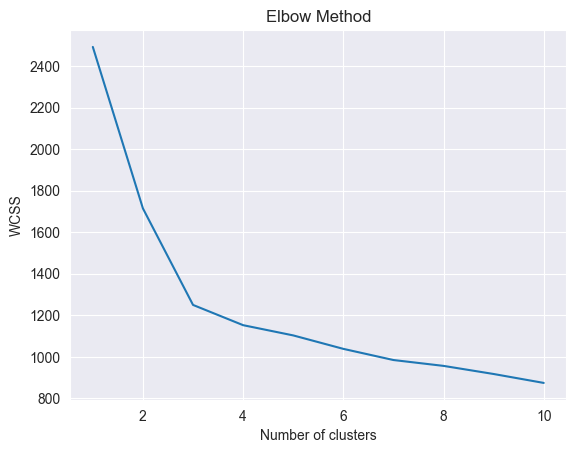

In [111]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(stnd_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### After the 7 clusters the slope is almost constant. Hence 7 is optimum cluster value.

### Building cluster model

In [126]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=42)
clusters_new.fit(stnd_df)

KMeans(n_clusters=7, random_state=42)

In [127]:
clusters_new.labels_

array([5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 5, 1,
       5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 0, 1, 2, 4, 4, 4, 4, 0, 4, 2, 0, 3, 2, 4, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 4, 6, 4, 2, 2, 4, 4, 0, 4, 4, 0, 4, 0, 4, 2,
       2, 2, 0, 0, 0, 0, 4, 0, 4, 4, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 6, 6,
       6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 6, 3, 3, 3, 3, 3, 6,
       3, 3])

In [128]:
#Assign clusters to the data set
stnd_df['clusterid_new'] = clusters_new.labels_

In [129]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 7.99603601e-02, -1.04680820e+00, -2.04673873e-01,
         2.53701857e-01,  9.82819712e-01, -8.30409470e-01,
        -4.35722885e-01, -1.37540364e-01,  7.65203503e-01,
        -1.19305338e-01, -1.05408470e+00,  3.60917233e-01,
         2.19758212e-01, -8.55130900e-01,  2.22044605e-16],
       [-1.16932627e+00,  6.33481301e-01, -1.38064258e-01,
         7.08701915e-01, -3.14997757e-01,  6.22446193e-01,
         6.25005531e-01,  7.31205573e-01, -3.76150625e-01,
         1.38686325e-01, -6.17864265e-02,  6.31769106e-01,
         6.87281212e-01,  9.94890255e-01,  1.00000000e+00],
       [ 7.99603601e-02, -9.38329474e-01, -2.87450625e-01,
        -3.68550911e-01,  7.79477703e-02, -5.64264385e-01,
         8.76295320e-01,  8.25993880e-01, -6.59563114e-01,
         7.07217280e-01, -6.96884209e-01,  2.04873048e-01,
         6.55111609e-01, -7.89732979e-01,  4.00000000e+00],
       [ 1.33792259e+00,  2.30848815e-01,  9.14357478e-01,
         2.19920490e-01,  5.99805134e-01, -3.48163675

In [130]:
stnd_df.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new      Type   Alcohol     Malic       Ash Alcalinity Magnesium  \
                     mean      mean      mean      mean       mean      mean   
0             0  0.079960 -1.046808 -0.204674  0.253702   0.982820 -0.830409   
1             1 -1.169326  0.633481 -0.138064  0.708702  -0.314998  0.622446   
2             2  0.079960 -0.938329 -0.287451 -0.368551   0.077948 -0.564264   
3             3  1.337923  0.230849  0.914357  0.219920   0.599805 -0.348164   
4             4  0.079960 -0.772804 -0.687687 -1.302320  -0.437337 -0.461901   
5             5 -1.213944  1.156401 -0.374908 -0.025485  -1.185002  0.615888   
6             6  1.281443 -0.045762  0.774347  0.569316   0.890486  1.211011   

    Phenols Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
       mean       mean          mean            mean      mean      mean   
0 -0.435723  -0.137540      0.765204       -0.119305 -1.054085  0.360917   
1  0.625006   0.731206     -0.376151        0.138686 -0.061786  0.631769   
2  0.876295   0.825994     -0.659563        0.707217 -0.696884  0.204873   
3 -0.923301  -1.352670      1.187017       -0.765950  0.872737 -1.182255   
4 -0.443286  -0.353744     -0.061426       -0.435061 -0.875055  0.639482   
5  1.129464   1.165011     -0.789528        1.064168  0.603380  0.398670   
6 -1.165304  -0.922916     -0.671074       -0.688924  0.824817 -1.198789   

   Dilution   Proline  
       mean      mean  
0  0.219758 -0.855131  
1  0.687281  0.994890  
2  0.655112 -0.789733  
3 -1.209627 -0.369592  
4 -0.016505 -0.632150  
5  0.865588  1.329096  
6 -1.480401 -0.407503

In [131]:
stnd_df.head(5)

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0 -1.213944  1.518613 -0.547641  0.273971   -1.254501   2.322386  0.808997   
1 -1.213944  0.246290 -0.479490 -0.901621   -2.712903   0.111335  0.568648   
2 -1.213944  0.196879  0.085189  1.246874   -0.260136   0.193225  0.808997   
3 -1.213944  1.691550 -0.313981  0.557734   -0.856755   1.175915  2.491446   
4 -1.213944  0.295700  0.309113  2.057627    0.535356   1.585369  0.808997   

   Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0    1.034819      -0.659563         1.344130  0.352805  0.392826  1.847920   
1    0.733629      -0.820719        -0.540944 -0.250988  0.438116  1.113449   
2    1.215533      -0.498407         2.314663  0.371973  0.347536  0.788587   
3    1.466525      -0.981875         1.138825  1.387878 -0.422392  1.184071   
4    0.663351       0.226796         0.466917 -0.279740  0.392826  0.449601   

    Proline  clusterid_new  
0  1.013009              5  
1  0.965242              5  
2  1.395148              5  
3  2.334574              5  
4 -0.037874              1

## Hierarchical clustering

In [132]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

### Drawing dendrogram for each linkage to find the optimum number of clusters
### Dendrogram of single linkage

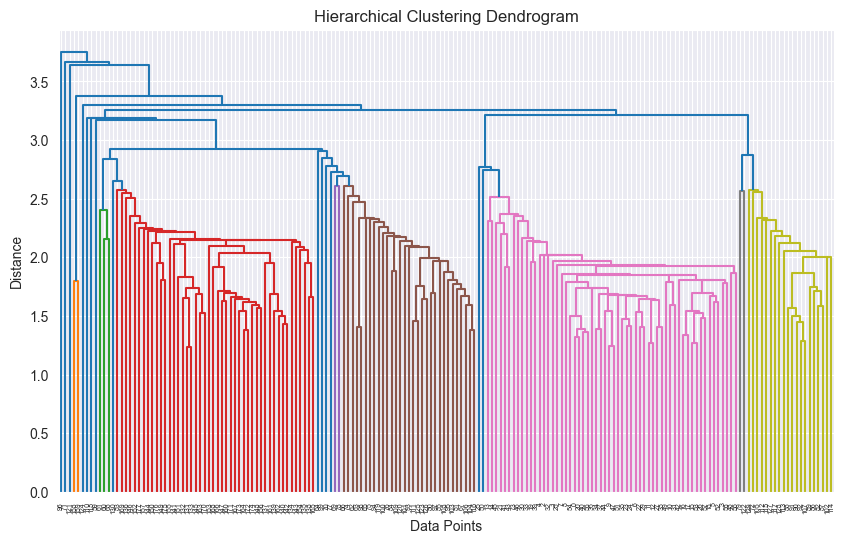

In [121]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(stnd_df, method='single'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of complete linkage

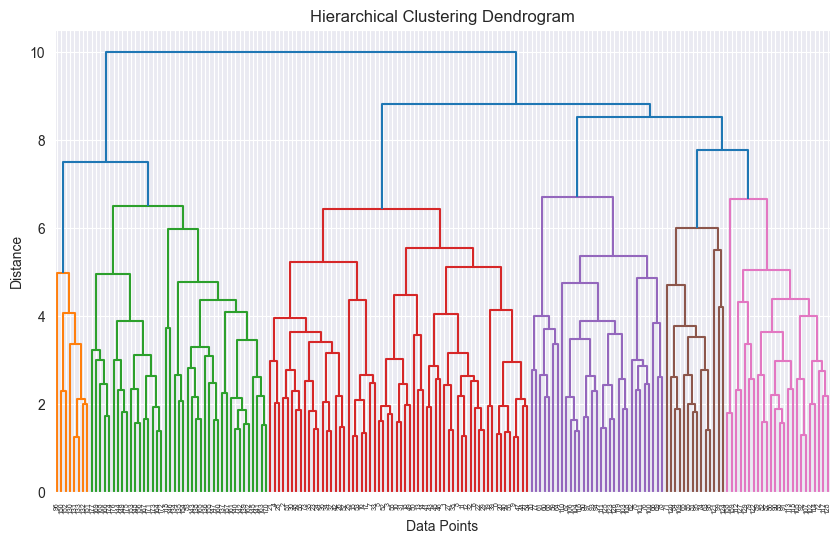

In [122]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(stnd_df, method='complete'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of average linkage

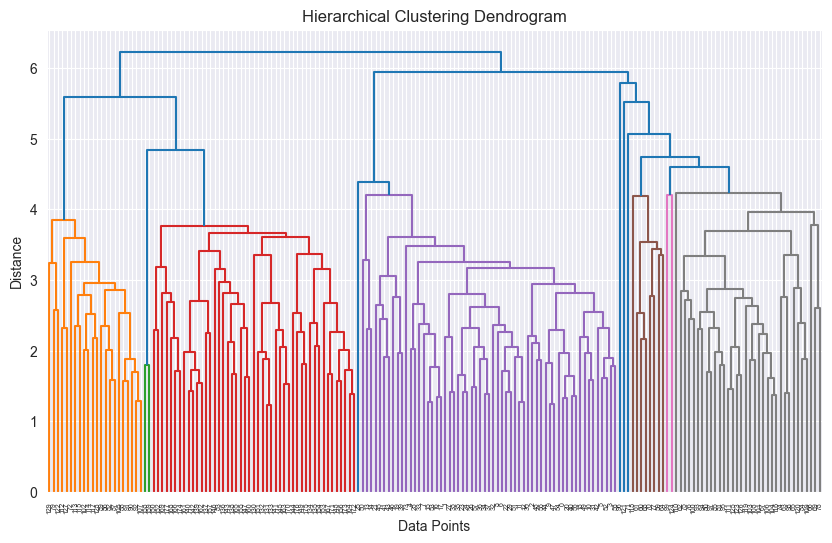

In [123]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(stnd_df, method='average'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of centroid linkage

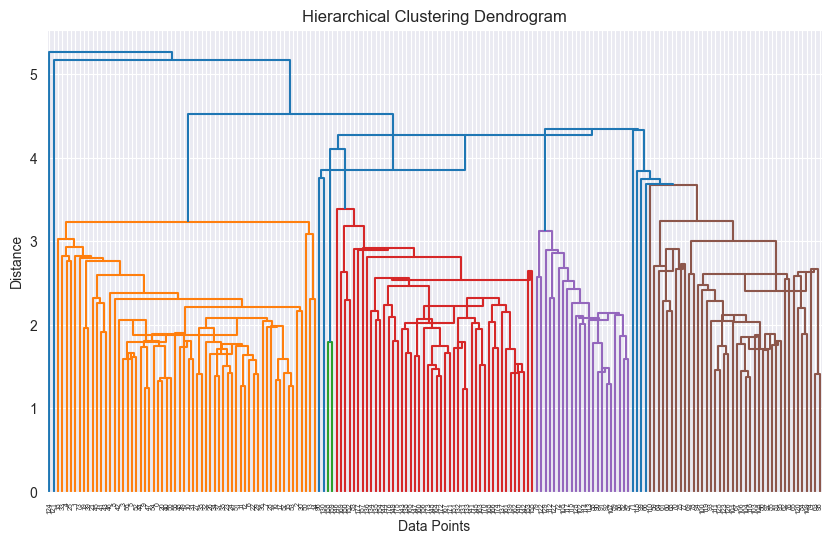

In [124]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(stnd_df, method='centroid'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of ward linkage

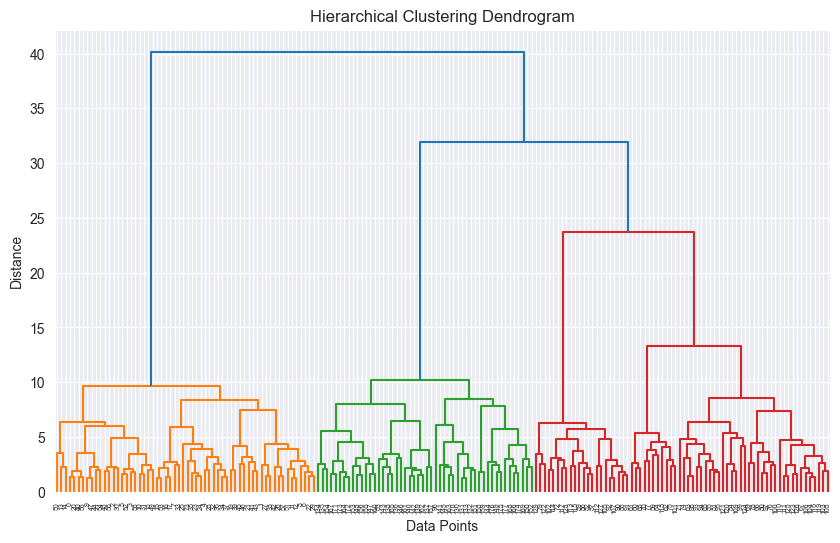

In [125]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(stnd_df, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### From the dendrogram we can see different clustering.
### Single linkage - 10 clusters
### Complete linkage - 7 clusters
### Average linkage - 7 clusters
### Centroid linkage - 6 clusters
### Ward linkage - 4 clusters
### From the above clustering we can conclude that 5 is the optimum number of clustering as average linkage suggest the same. 

In [133]:
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'average')

In [134]:
# save clusters for chart
y_hc = hc.fit_predict(stnd_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [135]:
Clusters.head(5)

Clusters
0         5
1         5
2         5
3         5
4         1

In [136]:
h_df = df.drop(['clusterid_new'], axis=1)

In [137]:
# Concatenate the original dataframe qaqnd cluster dataframe
heir_df = pd.concat([h_df, Clusters], axis=1)

In [138]:
heir_df.head(5)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Clusters  
0           0.28             2.29   5.64  1.04      3.92   1065.0         5  
1           0.26             1.28   4.38  1.05      3.40   1050.0         5  
2           0.30             2.81   5.68  1.03      3.17   1185.0         5  
3           0.24             2.18   7.80  0.86      3.45   1480.0         5  
4           0.39             1.82   4.32  1.04      2.93    735.0         1

### Conclusion : Before applying PCA, 7 clusters are to be required. After applying PCA, only 5 clusters are required for forming clusters. Hence applying PCA reduces clusters and help improve analysing the data.  